In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from ANF.net import ANF_net, ANFDataset
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = ANFDataset('./dataset/ANFdata/', 'adrenal_gland')
n_sample = len(dataset)
n_train = int(n_sample*0.5)
n_test = n_sample - n_train
train_set, test_set = random_split(dataset, [n_train, n_test])
train_dataloader = DataLoader(train_set, batch_size = 16, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size = 16, shuffle=True)
n_patient = dataset[0][0].size()[1]
n_feature = dataset[0][0].size()[0]
n_cluster = len(np.unique(dataset[:][1][0]))

In [3]:
loss_list = []
def train_loop(dataloader, model, loss_fn, optimizer, noisy_label = False):
    for batch, (x, label) in enumerate(dataloader):
        if noisy_label:
            label = label[1]
        else:
            label = label[0] #true label
        output = model(x)
        loss = loss_fn(output, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_list.append(loss.item())
        if(batch % 100 == 0):
            print('{} : loss={:.6f}'.format(batch, loss.item()))

In [4]:
net = ANF_net(n_patient, n_feature, n_cluster)
optimizer  = optim.Adam(net.parameters(), lr=0.005)
loss = nn.CrossEntropyLoss()

for i in range(30):
    print('epoch {}'.format(i+1))
    train_loop(train_dataloader, net, loss, optimizer, noisy_label=False)

epoch 1
0 : loss=0.728734
epoch 2
0 : loss=0.484901
epoch 3
0 : loss=0.489949
epoch 4
0 : loss=0.545315
epoch 5
0 : loss=0.535465
epoch 6
0 : loss=0.551197
epoch 7
0 : loss=0.324048
epoch 8
0 : loss=0.389316
epoch 9
0 : loss=0.195062
epoch 10
0 : loss=0.094920
epoch 11
0 : loss=0.027155
epoch 12
0 : loss=0.010274
epoch 13
0 : loss=0.013337
epoch 14
0 : loss=0.002506
epoch 15
0 : loss=0.005824
epoch 16
0 : loss=0.001009
epoch 17
0 : loss=0.001310
epoch 18
0 : loss=0.001001
epoch 19
0 : loss=0.000869
epoch 20
0 : loss=0.001258
epoch 21
0 : loss=0.000668
epoch 22
0 : loss=0.001426
epoch 23
0 : loss=0.001354
epoch 24
0 : loss=0.000570
epoch 25
0 : loss=0.000904
epoch 26
0 : loss=0.000873
epoch 27
0 : loss=0.000255
epoch 28
0 : loss=0.000328
epoch 29
0 : loss=0.000323
epoch 30
0 : loss=0.000329


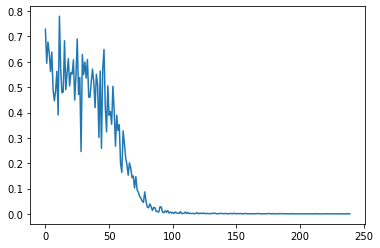

In [5]:
plt.plot(loss_list)

In [6]:
def test_loop(dataloader, model, loss_fn):
    true_cnt = 0
    tot_cnt = 0
    with torch.no_grad():
        for x, label in dataloader:
            label = label[0]
            output = model(x)
            y_pred = np.argmax(output, axis = 1)
            #print('y_pred=', y_pred)
            #print('label=', label.numpy())
            true_cnt += np.sum(y_pred.numpy() == label.numpy())
            tot_cnt += len(label)
        correct = true_cnt / tot_cnt
        print('Accuracy: {:.2f}%'.format(correct * 100))
    
test_loop(test_dataloader, net, loss)

Accuracy: 96.06%


In [7]:
# 查看第一层（融合层）3个图的权重
for name, p in net.named_parameters():
    if(name[:6] == 'weight'):
        print(name, p)

weight.weight Parameter containing:
tensor([[[-1.0835],
         [-0.1534],
         [-1.1840]]], requires_grad=True)
weight.bias Parameter containing:
tensor([-0.0508], requires_grad=True)
